           Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Decision Tree  0.796667   0.761589  0.821429  0.790378  0.798214
1            KNN  0.903333   0.862745  0.942857  0.901024  0.965379
2  Random Forest  0.886667   0.873239  0.885714  0.879433  0.964933

Confusion Matrix for Decision Tree:

          Predicted 0  Predicted 1
Actual 0          124           36
Actual 1           25          115

Confusion Matrix for KNN:

          Predicted 0  Predicted 1
Actual 0          139           21
Actual 1            8          132

Confusion Matrix for Random Forest:

          Predicted 0  Predicted 1
Actual 0          142           18
Actual 1           16          124


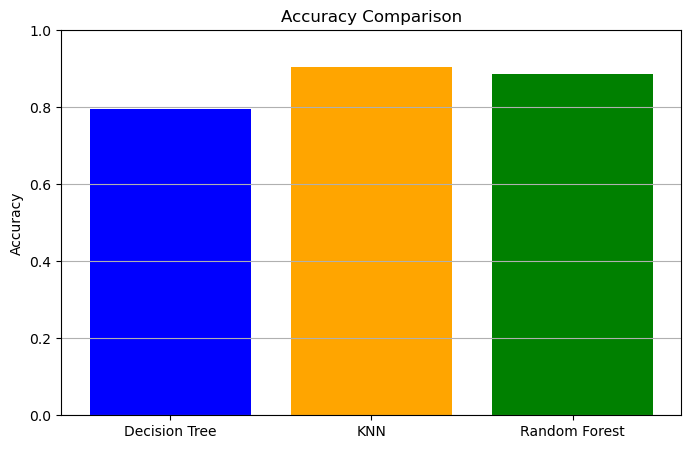

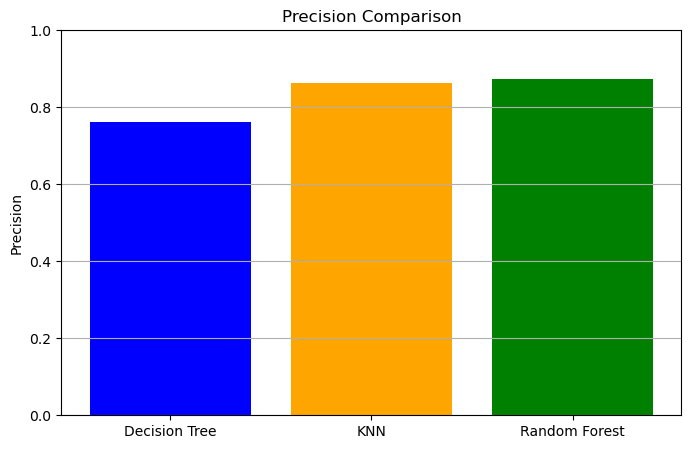

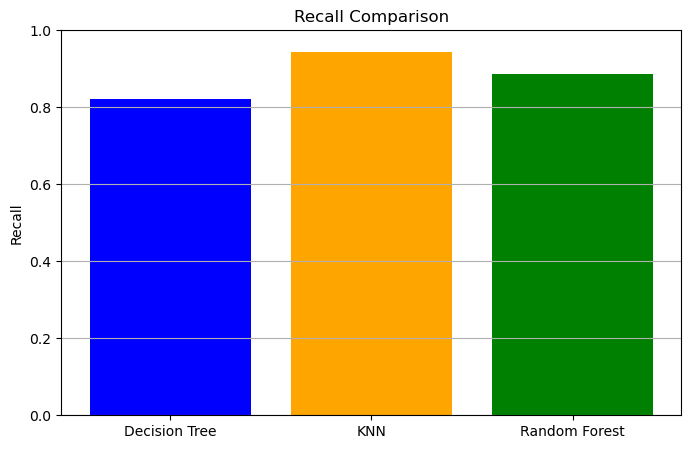

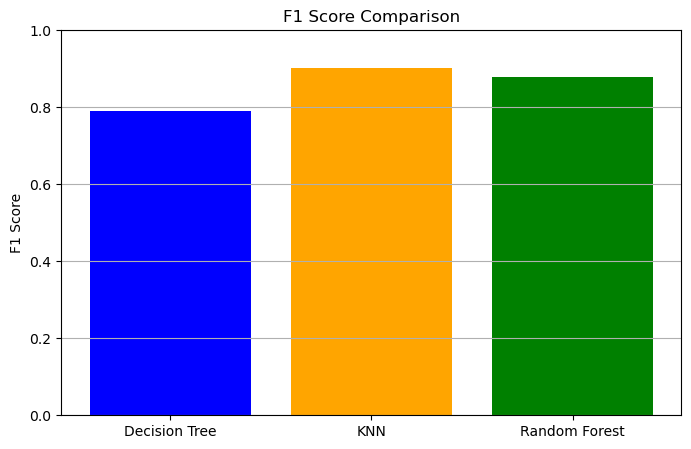

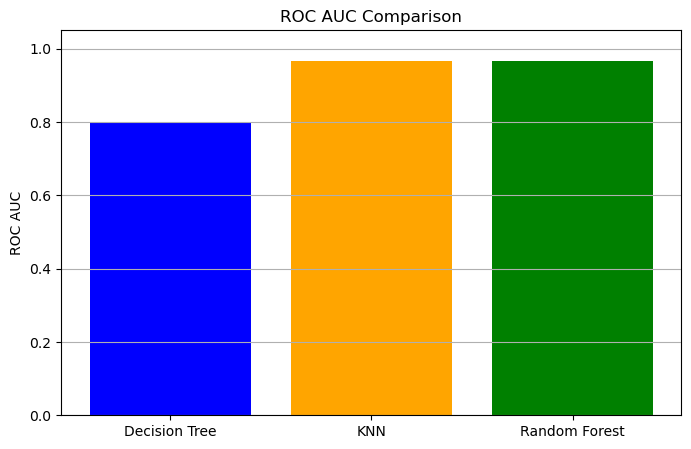

In [35]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import pandas as pd

# Generar un dataset simulado binario
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42
)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

# Almacenar métricas y tablas de contingencia
results = []
confusion_matrices = {}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Guardar resultados
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
    })
    
    # Calcular y almacenar la matriz de confusión
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

# Mostrar resultados en formato tabular
df_results = pd.DataFrame(results)
print(df_results)

# Mostrar la matriz de confusión para cada modelo
for model_name, cm in confusion_matrices.items():
    print(f"\nConfusion Matrix for {model_name}:\n")
    cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
    print(cm_df)

# Graficar resultados
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(df_results["Model"], df_results[metric], color=["blue", "orange", "green"])
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.ylim(0, 1 if metric != "ROC AUC" else 1.05)
    plt.grid(axis="y")
    plt.show()


In [28]:
n = (124+36+25+115)
accuracy = (124+115)/n
accuracy

0.7966666666666666

In [29]:
precision = 115/(115+36)
precision

0.7615894039735099

In [30]:
recall = 115/(115+25)
recall

0.8214285714285714

In [31]:
f1_score = (2*precision*recall)/(precision+recall)
f1_score

0.7903780068728523

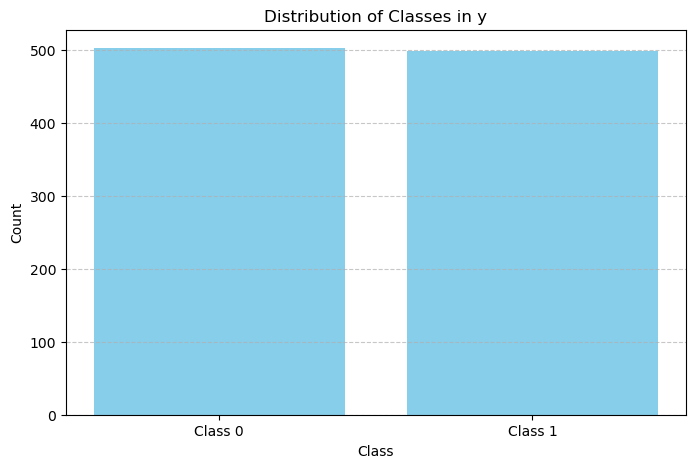

In [3]:
# Contar las clases
unique_classes, counts = np.unique(y, return_counts=True)

# Graficar las clases
plt.figure(figsize=(8, 5))
plt.bar(unique_classes, counts, color="skyblue")
plt.title("Distribution of Classes in y")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(unique_classes, labels=[f"Class {int(cls)}" for cls in unique_classes])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Cargar el dataset de diabetes
data = load_diabetes(as_frame=True)
X = data.data
y = data.target

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar los modelos
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
}

# Entrenar y evaluar los modelos
results = []

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predicciones
    y_pred = model.predict(X_test)
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Guardar resultados
    results.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "R²": r2,
    })

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results)

# Imprimir en consola
print(df_results)


               Model          MSE        MAE        R²
0      Random Forest  2859.641983  42.750752  0.470271
1  Linear Regression  2821.750981  41.919378  0.477290


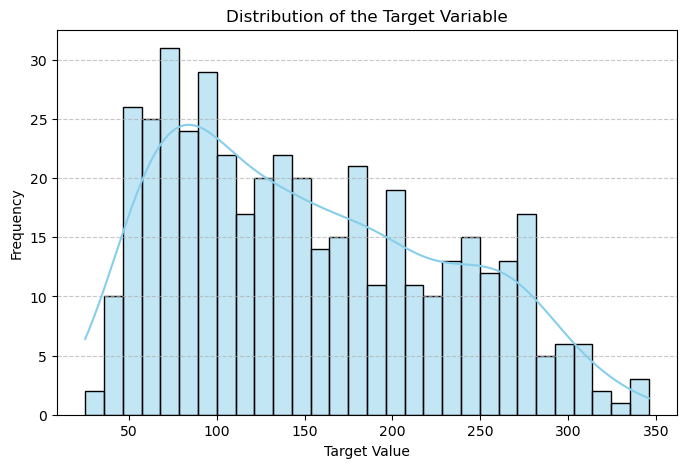

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset de diabetes
data = load_diabetes(as_frame=True)
df = data.frame

# Graficar la distribución de la variable objetivo
plt.figure(figsize=(8, 5))
sns.histplot(df['target'], kde=True, color="skyblue", bins=30)
plt.title("Distribution of the Target Variable")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


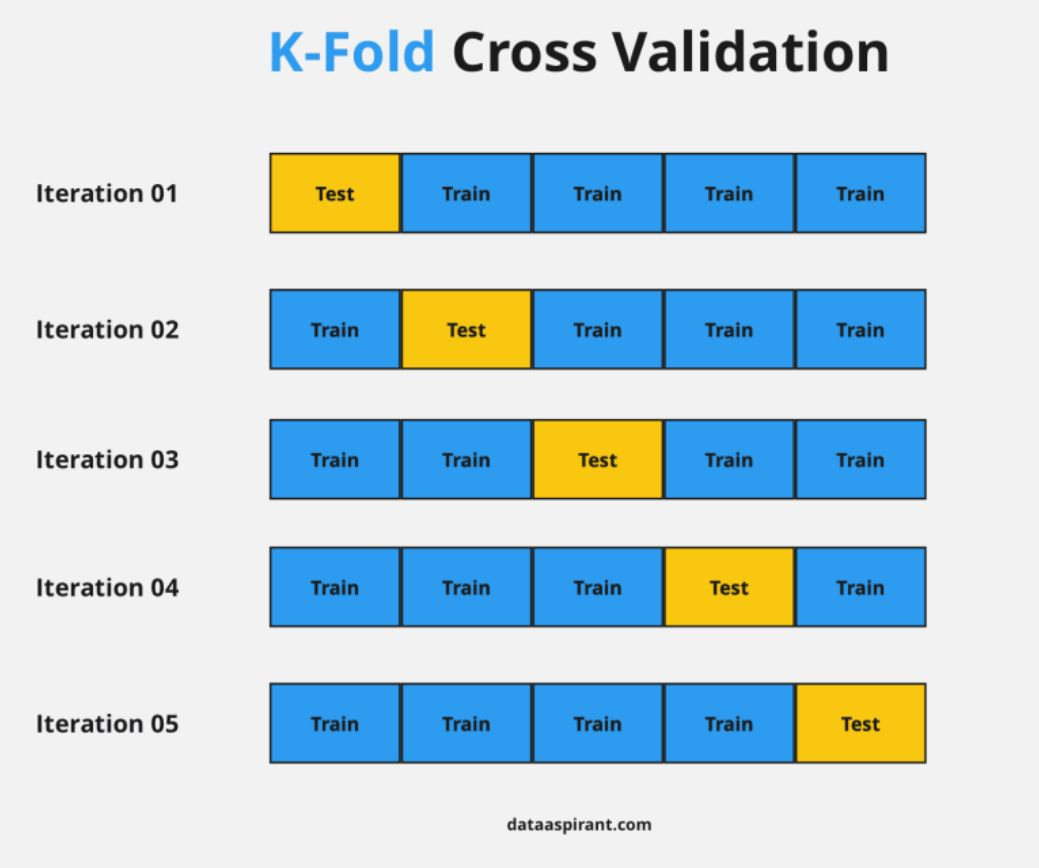

In [13]:
import optuna
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Cargar el dataset de diabetes
data = load_diabetes(as_frame=True)
X = data.data
y = data.target

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir función de evaluación para Random Forest
def objective_random_forest(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )
    mse = -np.mean(cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return mse

# Optimizar Random Forest
study_rf = optuna.create_study(direction="minimize")
study_rf.optimize(objective_random_forest, n_trials=50)

# Entrenar el mejor modelo de Random Forest
best_rf_params = study_rf.best_params
best_rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Definir función de evaluación para Linear Regression
def objective_linear_regression(trial):
    model = LinearRegression()
    mse = -np.mean(cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return mse

# Optimizar Linear Regression (sin hiperparámetros ajustables)
study_lr = optuna.create_study(direction="minimize")
study_lr.optimize(objective_linear_regression, n_trials=1)

# Entrenar el modelo de Regresión Lineal
best_lr_model = LinearRegression()
best_lr_model.fit(X_train, y_train)

# Evaluar ambos modelos en el conjunto de prueba
models = {
    "Random Forest": best_rf_model,
    "Linear Regression": best_lr_model,
}
results = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "R²": r2,
    })

# Mostrar resultados en un DataFrame
df_results = pd.DataFrame(results)

# Mostrar resultados
print(df_results)


/opt/miniconda3/envs/mitic-data-science-team-1-septiembre-2024-ML/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-19 19:20:17,767] A new study created in memory with name: no-name-1aea0617-78c7-43d7-9606-292210d028b0
[I 2024-11-19 19:20:18,157] Trial 0 finished with value: 3476.590461011308 and parameters: {'n_estimators': 111, 'max_depth': 17, 'min_samples_split': 11, 'min_samples_leaf': 6}. Best is trial 0 with value: 3476.590461011308.
[I 2024-11-19 19:20:18,564] Trial 1 finished with value: 3475.252336809487 and parameters: {'n_estimators': 123, 'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 6}. Best is trial 1 with value: 3475.252336809487.
[I 2024-11-19 19:20:18,980] Trial 2 finished with value: 3470.2858605951856 and parameters: {'n_estimators': 126, 'max_depth': 19, 'min

               Model          MSE        MAE        R²
0      Random Forest  2772.548231  42.189910  0.486404
1  Linear Regression  2821.750981  41.919378  0.477290
